we looked at univariate data. In this one, we will use multivariate data and try to find outliers. Let’s use a very small dataset to understand the LOF algorithm for outlier detection.
We will create a 5 X 2 matrix, and looking at the data, we know that the last tuple is an
outlier. Let’s also plot it as a scatter plot:

In [2]:
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt

In [11]:
instances = np.matrix([[0,0],[0,1],[1,1],[1,0],[5,0]])

In [12]:
x = np.squeeze(np.array(instances[:,0]))
y = np.squeeze(np.array(instances[:,1]))

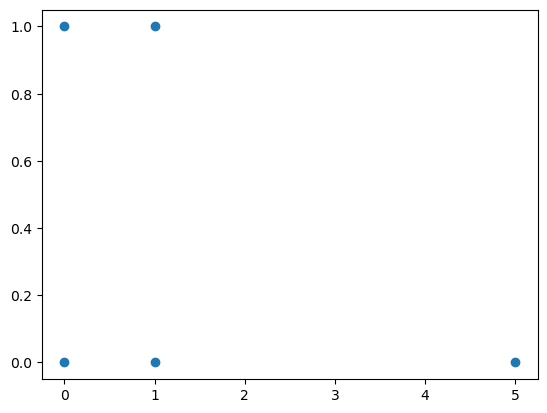

In [13]:
plt.cla()
plt.figure(1)
plt.scatter(x, y)
plt.show()

In [14]:
#Let’s get the pairwise distance between the points:
k = 2
distance = 'manhattan'

In [15]:
from sklearn.metrics import pairwise_distances
dist = pairwise_distances(instances,metric=distance)

/root/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


In [20]:
#Let’s calculate the k-distance. We will use heapq and get the k-nearest neighbors:
#calculate K distance 
import heapq
k_distance = defaultdict(tuple)
#For each data point
for i in range(instances.shape[0]):
    # Get its distance to all the other points.
    # Convert array into list for convienience
    distances = dist[i].tolist()
    
    #Get the K nearest neighbours
    ksmallest = heapq.nsmallest(k+1, distances)[1:][k-1]
    
    #get their indices
    ksmallest_idx = distances.index(ksmallest)
    
    #For each data point store the K th nearest neighbour and its distance
    k_distance[i] = (ksmallest, ksmallest_idx)
    
#Calculate the k-distance neighborhood: 
def all_indices(value, inlist):
    out_indices = []
    idx = -1
    while True:
        try:
            idx = inlist.index(value, idx+1)
            out_indices.append(idx)
        except ValueError:
            break
    return out_indices

In [21]:
#Calculate K distance neighbourhood
k_distance_neig = defaultdict(list)

#for each data point
for i in range(instances.shape[0]):
    #Get the points distances to its neighbours
    distances = dist[i].tolist()
    print("K distance neighbourhood", i)
    print(distances)
    #Get the 1 to K nearest neighbours
    ksmallest = heapq.nsmallest(k+1, distances)[1:]
    print(ksmallest)
    ksmallest_set = set(ksmallest)
    print(ksmallest_set)
    
    
    print(ksmallest)
    ksmallest_set = set(ksmallest)
    print(ksmallest_set)
    ksmallest_idx = []
    
    #Get the indices of the K smallest elements
    for x in ksmallest_set:
        ksmallest_idx.append(all_indices(x, distances))
    
    #Change a list of list to list
    ksmallest_idx = [item for sublist in ksmallest_idx for item in sublist]
    
    #For each data pont store the K distance neighbourhood 
    k_distance_neig[i].extend(zip(ksmallest, ksmallest_idx))

K distance neighbourhood 0
[0.0, 1.0, 2.0, 1.0, 5.0]
[1.0, 1.0]
{1.0}
[1.0, 1.0]
{1.0}
K distance neighbourhood 1
[1.0, 0.0, 1.0, 2.0, 6.0]
[1.0, 1.0]
{1.0}
[1.0, 1.0]
{1.0}
K distance neighbourhood 2
[2.0, 1.0, 0.0, 1.0, 5.0]
[1.0, 1.0]
{1.0}
[1.0, 1.0]
{1.0}
K distance neighbourhood 3
[1.0, 2.0, 1.0, 0.0, 4.0]
[1.0, 1.0]
{1.0}
[1.0, 1.0]
{1.0}
K distance neighbourhood 4
[5.0, 6.0, 5.0, 4.0, 0.0]
[4.0, 5.0]
{4.0, 5.0}
[4.0, 5.0]
{4.0, 5.0}


In [23]:
#Then, calculate the reachability distance and LRD:
#Local reachable density
local_reach_density = defaultdict(float)
for i in range(instances.shape[0]):
    #LRDs numerator, number of K distance neighbourhood
    no_neighbours = len(k_distance_neig[i])
    denom_sum = 0
    #reachability distance sum
    for neigh in k_distance_neig[i]:
        #maximum(K-Distance(P), Distance(P,Q))
        denom_sum += max(k_distance[neigh[1]][0], neigh[0])
    local_reach_density[i] = no_neighbours/(1.0*denom_sum)

In [24]:
#Calculate LOF:
lof_list = []
#Local Outlier Factor

for i in range(instances.shape[0]):
    lrd_sum = 0
    rdist_sum = 0
    for neigh in k_distance_neig[i]:
        lrd_sum += local_reach_density[neigh[1]]
        rdist_sum += max(k_distance[neigh[1]][0], neigh[0])
    lof_list.append((i, lrd_sum * rdist_sum))